# Exercise 5 (without using for or if)
- Required packages:
    - `Plots.jl` (for plotting)
    - `ExcelReaders.jl` (to read excel file)

In [1]:
using Plots
pyplot()
using ExcelReaders

## Function for HP filter
I am using sparse matrix and a function `spdiagm` to create matrix `H`

In [2]:
function hp_filter(y::AbstractVector{T}, lambda::Real) where T <: Real
    N = length(y)
    H = spdiagm(-2 => fill(lambda, N-2),
                -1 => vcat(-2lambda, fill(-4lambda, N-3), -2lambda),
                 0 => vcat(1+lambda, 1+5lambda, fill(1+6lambda, N-4),
                           1+5lambda, 1+lambda),
                 1 => vcat(-2lambda, fill(-4lambda, N-3), -2lambda),
                 2 => fill(lambda, N-2))
    y_trend = H\y
    y_cyclical = y - y_trend
    return y_trend, y_cyclical
end


T) in module Base at deprecated.jl:56 overwritten in module StatsBase at C:\Users\holly\.julia\v0.6\StatsBase\src\hist.jl:535.

hp_filter (generic function with 1 method)

 in module StatsBase at C:\Users\holly\.julia\v0.6\StatsBase\src\hist.jl:533.


## Apply HP filter

In [3]:
data = readxlsheet("data/US_Data.xlsx", "Data")
y = collect(data[4:end, 2]) # removing header
T = length(y)
@time (ytr1600, yc1600) = hp_filter(Float64.(y), 1600)
@time (ytr100000, yc100000) = hp_filter(Float64.(y), 100000)

  5.239342 seconds (3.03 M allocations: 162.836 MiB, 1.42% gc time)
  0.007106 seconds (623 allocations: 564.594 KiB)


([1775.78, 1797.81, 1819.83, 1841.86, 1863.89, 1885.93, 1907.97, 1930.02, 1952.08, 1974.14  …  12616.2, 12700.1, 12783.9, 12867.8, 12951.6, 13035.5, 13119.4, 13203.3, 13287.1, 13371.0], [47.6206, 59.0947, 47.0683, 27.9404, -20.0906, -48.8265, -50.269, -89.719, -37.4774, -1.24372  …  66.9964, 48.6446, 131.985, 94.7209, 14.2537, 25.1842, -19.4868, 0.740762, 33.9676, 20.1943])

## Plot trend component


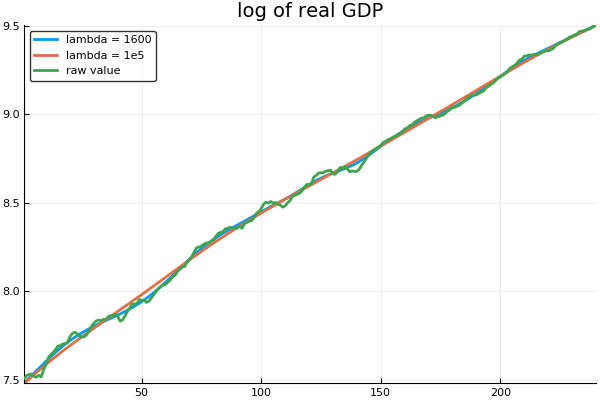

In [4]:
plot([log.(ytr1600), log.(ytr100000), log.(y)], lw = 2,
     lab = ["lambda = 1600" "lambda = 1e5" "raw value"],
     title = "log of real GDP")

## Plot cyclical component


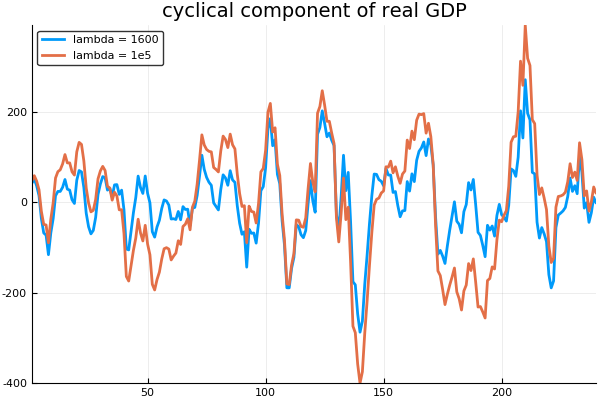

In [5]:
p = plot([yc1600, yc100000], lw = 2,
         lab = ["lambda = 1600" "lambda = 1e5"],
         title = "cyclical component of real GDP")
